In [121]:
import matplotlib.pyplot as plt
import sys
from glob import glob
from matplotlib import cm
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection
import numpy as np
import seaborn as sns
import DNSmodule as dns

params = {'legend.fontsize':'x-large','font.size':10,'axes.labelsize': 'xx-large','xtick.labelsize':'xx-large','ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.style.use('ggplot')

In [122]:
files = glob('WN_test_varying_resol/WN*b_*spc')

ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus,lbs,viscs, Pms, Ns, kps = dns.get_data_MHD(files)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs,lus,lbs, viscs, Pms, Ns, kps, files = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs,lus,lbs,viscs, Pms, Ns, kps, files, idx_sort)
idx_sort = np.argsort(kps)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs,lus,lbs,viscs, Pms, Ns, kps, files = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs,lus,lbs,viscs, Pms, Ns, kps, files, idx_sort)


In [123]:
def resolution_check(f_NH):
    

    ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
    idx_sort = np.argsort(Pms)
    ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
    colors = sns.color_palette('hls',len(f_NH))
    for id_f, f in enumerate(f_NH):
        lu = lus[id_f]
        lb = lbs[id_f]
        Pm = Pms[id_f]
        N = Ns[id_f]
        visc = viscs[id_f]
        kmax = ks[id_f].max()
        time = times[id_f]
        plt.plot(time,kmax*lu,c=colors[id_f],lw=2,label='{} {} {}'.format(N,visc,Pm))
        plt.plot(time,kmax*lb,c=colors[id_f])
        if (True in (kmax * lu < 1.25 )) or (True in (kmax * lb < 1.25 )):
            print(f)
        
    plt.legend()
    plt.hlines(1.25,0,5,color='0.7',ls='--')
    plt.xlim(0.01,5)
    plt.yscale('log')
    plt.xscale('log')
    #plt.ylim(0.6,2)
    plt.show()

# Comparing different k_peaks and different viscs with Pm=1

In [124]:
#assign colors depending on the different kp values

tags = [int(kp) if kp.is_integer() else kp for kp in kps]
ls = ['-' for i in range(len(files))]
colors = []
_colors = sns.color_palette('hls',8)
for kp in kps:
    if kp == 5:
        colors.append(_colors[0])
    elif kp == 20:
        colors.append(_colors[4])
    else:
        colors.append(_colors[7])


WN_test_varying_resol/WN100.b_1024_0.0004_1.spc
WN_test_varying_resol/WN100.b_1024_0.0009_1.spc
WN_test_varying_resol/WN100.b_1024_0.001_1.spc


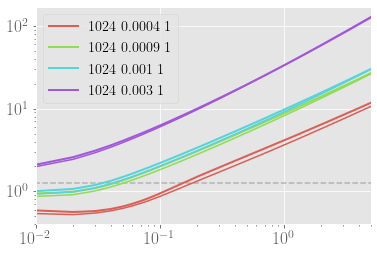

In [107]:
resolution_check(files[12:])

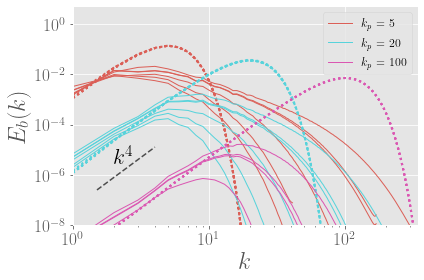

In [134]:
# Produce spectrum evolution Hardcoded times and label starting index
fig, ax = plt.subplots()
t = [0,367]

for idx, f in enumerate(files):
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    kp = kps[idx]

    
    for idx_t in t:
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=2,ls=':',)
        else:
            if idx in [0,6,12]:
                ax.plot(k,Bk[idx_t],c=colors[idx],lw = 1,label ='$k_p$ = {}'.format(int(kp)))
            else:
                ax.plot(k,Bk[idx_t],c=colors[idx],lw = 1,label ='__nolegend__')
k_slope = np.array([1.5,4])
ax.plot(k_slope,5e-8*np.power(k_slope,4),c='0.3',ls='--')
ax.text(2,3e-6,'$k^{4}$',size=22)
k2_slope = np.array([10,40])
#ax.plot(k2_slope,7e-3*np.power(k_slope,-2),c='0.3',ls='-')
#ax.plot(k2_slope,5e-2*np.power(k_slope,-3/2),c='0.3',ls='--')
#ax.plot(k2_slope,5e-1*np.power(k_slope,-5/3),c='0.3',ls=':')
#ax.text(30,3e-2,'$k^{-2}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_b(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.set_ylim(1e-8,5)
ax.set_xlim(1,341)
ax.legend(loc=1,fontsize=12)
fig.tight_layout()
#fig.savefig('Spectrum.pdf',format='pdf')

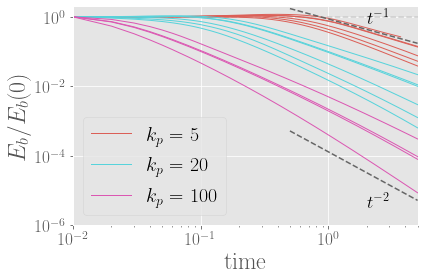

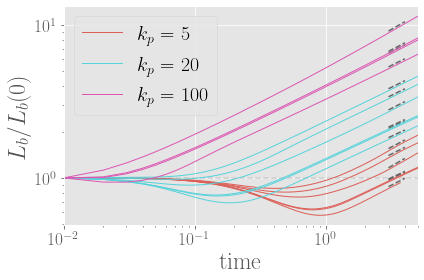

In [19]:
#produce time decay plots hardcoded 
fig, axE = plt.subplots()
figL, axL = plt.subplots()
p = []
q = []
for idx, f in enumerate(files):
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    visc = viscs[idx]
    
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[-200:]), np.log(B[-200:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[-200:]), np.log(Lb[-200:]), 1)
    q.append(mq)
    if idx in [0,6,12]:
        axE.plot(time,B/B[1],c=colors[idx],lw=1,label= '$k_p$ = {}'.format(tags[idx]))
        axL.plot(time,Lb/Lb[1],c=colors[idx],lw=1,label='$k_p$ = {}'.format(tags[idx]))
    else:
        axE.plot(time,B/B[1],c=colors[idx],lw=1,label='__nolegend__')
        axL.plot(time,Lb/Lb[1],c=colors[idx],lw=1,label='__nolegend__')
    t_lines = np.array([3,3.5,4])
    
    y = np.power(t_lines,mp)*np.exp(bp)/B[1]*1.1
    #axE.plot(t_lines,y,ls='--',c='0.4')
    #axE.text(t_lines[1],y[1]*1.3,'{:.2f}'.format(mp),size=18)
    y = np.power(t_lines,mq)*np.exp(bq)/Lb[1]*1.03
    axL.plot(t_lines,y,ls='--',c='0.4')
    #axL.text(t_lines[1],y[1]*1.15,'{:.2f}'.format(mq),size=18)
   

    
t_lines = np.array([0.5,2,5])
    
y = np.power(t_lines,-1)*np.exp(bp)/B[1]*2e3
axE.plot(t_lines,y,ls='--',c='0.4')
axE.text(t_lines[1],y[1]*1.5,'$t^{-1}$',size=18)
y = np.power(t_lines,-2)*np.exp(bp)/B[1]*3e-1
axE.plot(t_lines,y,ls='--',c='0.4')
axE.text(t_lines[1],y[1]*1e-1,'$t^{-2}$',size=18)

p = np.array(p)
q = np.array(q)

axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$E_{b}/E_b(0)$',size = 24)
axE.set_xlabel('time',size = 24)
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}/L_b(0)$',size = 24)
axL.set_xlabel('time',size = 24)
axE.legend(fontsize=20,loc=3)
axL.legend(fontsize=20,loc=2)

axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axL.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axE.set_xlim(1e-2,5)
axL.set_xlim(1e-2,5)
axE.set_ylim(1e-6,2)
fig.tight_layout()
fig.savefig('Eb_vs_t_WN.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


To = 0.78
To = 0.78
To = 0.78
To = 0.78
To = 0.78
To = 0.78
To = 0.19
To = 0.19
To = 0.19
To = 0.19
To = 0.20
To = 0.20
To = 0.04
To = 0.04
To = 0.04
To = 0.04


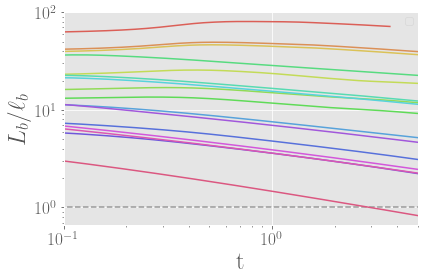

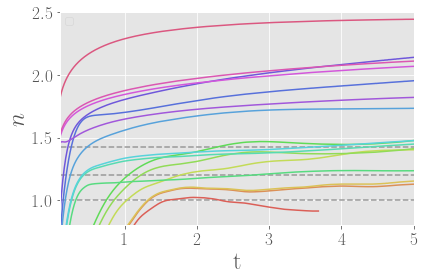

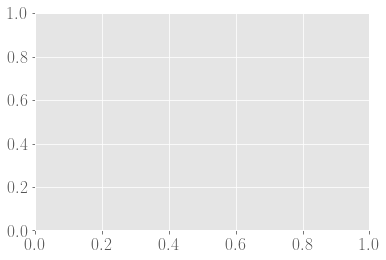

In [132]:
# n over time


figE, axE = plt.subplots()
fign, axn = plt.subplots()
figx,axx = plt.subplots()

col_NH = sns.color_palette('hls',len(files))

for id_f,f in enumerate(files):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    Lu   = Lus[id_f]
    lb = lbs[id_f]
    epsu = epsus[id_f]
    epsb = epsbs[id_f]
    T = Tus[id_f]
    print('To = {:.2f}'.format(T[0]))
    E = Es[id_f]
    time = times[id_f]
    Pm = Pms[id_f] 
    n = -np.gradient(np.log(B[1:]),np.log(time[1:]))
    axE.plot(time, Lb/lb, color=col_NH[id_f])
    axn.plot(time[1:],n, color=col_NH[id_f])

axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$L_{b}/\ell_b$',size = 24)
axE.set_xlabel('t',size = 24)
axE.legend(fontsize=10)
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axE.set_xlim(1e-1,5)

#axn.set_xscale('log')
#axn.set_yscale('log')
axn.set_ylabel('$n$',size = 24)
axn.set_xlabel('t',size = 24)
axn.legend(fontsize=10)
axn.hlines([1,10/7,6/5],1e-4,1e3,linestyles = '--',colors = '0.6')
axn.set_xlim(1e-1,5)
axn.set_ylim(0.8,2.5)

axn.set_xscale('log')
axn.set_yscale('log')
axx.set_ylabel('$\\varepsilon_b/\\varepsilon_u$',size = 24)
axx.set_xlabel('t',size = 24)
axx.legend(fontsize=10)
axx.hlines([1,10/7,6/5],1e-4,1e3,linestyles = '--',colors = '0.6')
axx.set_xlim(1e-1,5)
axx.set_ylim(0.8,2.5)

figE.tight_layout()
#figE.savefig('Eb_vs_t_DNS.pdf',format='pdf')
fign.tight_layout()
#fign.savefig('Lb_vs_t_DNS.pdf',format='pdf')

plt.show()

kp = 5.0     , visc = 0.0004 	 p = 0.91 	 q = 0.40
kp = 5.0     , visc = 0.0009 	 p = 1.11 	 q = 0.40
kp = 5.0     , visc = 0.001 	 p = 1.13 	 q = 0.40
kp = 5.0     , visc = 0.003 	 p = 1.38 	 q = 0.50
kp = 5.0     , visc = 0.006 	 p = 1.38 	 q = 0.42
kp = 5.0     , visc = 0.009 	 p = 1.45 	 q = 0.44
kp = 20.0    , visc = 0.0004 	 p = 1.24 	 q = 0.41
kp = 20.0    , visc = 0.0009 	 p = 1.42 	 q = 0.39
kp = 20.0    , visc = 0.001 	 p = 1.45 	 q = 0.39
kp = 20.0    , visc = 0.003 	 p = 1.73 	 q = 0.43
kp = 20.0    , visc = 0.006 	 p = 1.92 	 q = 0.42
kp = 20.0    , visc = 0.009 	 p = 2.10 	 q = 0.42
kp = 100.0   , visc = 0.0004 	 p = 1.80 	 q = 0.43
kp = 100.0   , visc = 0.0009 	 p = 2.04 	 q = 0.45
kp = 100.0   , visc = 0.001 	 p = 2.08 	 q = 0.45
kp = 100.0   , visc = 0.003 	 p = 2.44 	 q = 0.49


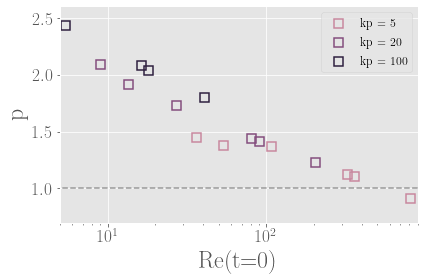

In [30]:
plt.style.use('ggplot')
fig,ax = plt.subplots()
p_colors = sns.cubehelix_palette(4)

    
p = []
q = []
ti = 350
Res = []
Flag5 = True
Flag20 = True
Flag100 = True
for idx, f in enumerate(files):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    visc = viscs[idx]
    Va = Vas[idx]
    U = Us[idx]
    Lu = Lus[idx]
    Re = Lu[0]*U[0]/visc
    Res.append(Re)
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    kp = kps[idx]
    mp, bp = np.polyfit(np.log(time[ti:]), np.log(B[ti:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:]), np.log(Lb[ti:]), 1)
    q.append(mq)
    print('kp = {:<8}, visc = {} \t p = {:.2f} \t q = {:.2f}'.format(kp,visc,-mp,mq))
    
    if kp == 5:
        col = p_colors[1]
    elif kp ==20:
        col = p_colors[2]
    else:
        col = p_colors[3]
    if (kp == 5) and (Flag5 == True):
        label = 'kp = {:>}'.format(int(kp))
        Flag5=False
    elif (kp==20) and (Flag20 ==True):
        label = 'kp = {:>}'.format(int(kp))
        Flag20 =False
    elif (kp==100) and (Flag100 == True):
        label ='kp = {:>}'.format(int(kp))
        Flag100=False
    else:
        label = '__nolegend__'
    ax.plot(Re, -mp,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col,label= label)
    
        #ax.plot(Pms, q,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'goldenrod',label = '{:<}    {:>}'.format('$q$','hel'))
p = np.array(p)
q = np.array(q)




ax.set_xscale('log',basex=10)
ax.set_ylabel('p',size = 24)
ax.set_xlabel('Re(t=0)',size = 24)
ax.legend(loc=1,fontsize=12)
x_lims = ax.get_xlim()
ax.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
ax.set_xlim(5,900)
ax.set_ylim(0.7,2.6)
fig.tight_layout()
#fig.savefig('scalings_comparison_DNS_EDQNM.pdf',format='pdf')
plt.show()



# We can set Re(0) from the start using $\dfrac{2(2E_{uo}/3)^{1/2}}{k_p\nu}$

In [47]:
Res_p = (2/kps)*np.sqrt(1.24/3)/viscs

m = 1.00 and b = 0.23


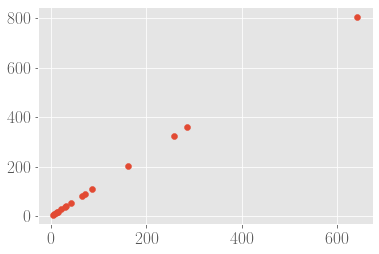

In [50]:
plt.scatter(Res_p,Res)
mp, bp = np.polyfit(np.log(Res_p), np.log(Res), 1)
print('m = {:.2f} and b = {:.2f}'.format(mp,bp))

In [52]:
def Re(kpeak,vis):
    return (2/kpeak) * np.sqrt(1.24/3)/vis

In [80]:
kp_s = np.array([5,10,20,40,80,160])
visc_s = 0.01*5*np.array([1/5,1/10,1/20,1/40,1/80,1/160])

print(kp_s)
print(visc_s)

[  5  10  20  40  80 160]
[0.01      0.005     0.0025    0.00125   0.000625  0.0003125]


In [ ]:
epsu0s = []
for epsu in epsus:
    epsu0s.append(epsu[0])

In [ ]:
epsu0s_p  = 1.5*np.sqrt(1.24/3)**3/(2/kps)

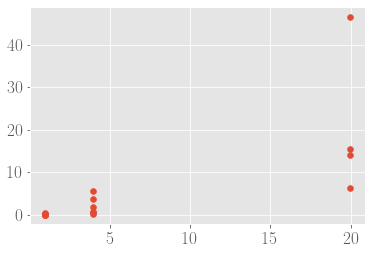

In [ ]:
plt.scatter(epsu0s_p,epsu0s)

In [75]:
f_dns_hel = 'helical_runs/dhff.b_1024_0.005_0.0625.spc'
f_dns = 'dnff.b_1024_0.005_0.0625.spc'
#f_edqnm = 'dnff_edqnm.u_192_0.005.spc'
E_dns = col_B(f_dns)
#E_edqnm = ed.col_B(f_edqnm)
E_dns_hel = col_B(f_dns_hel)
L_dns = col_L(f_dns)
L_dns_hel = col_L(f_dns_hel)
#L_edqnm = ed.col_L(f_edqnm)
dt_dns = get_dt(f_dns)
dt_dns_hel = get_dt(f_dns_hel)
Ntimesteps_dns = int((get_final_time(f_dns) - get_initial_time(f_dns))/dt_dns)
Ntimesteps_dns_hel = int((get_final_time(f_dns_hel) - get_initial_time(f_dns_hel))/dt_dns_hel)
t_dns = [round(i*dt_dns,2) for i in range(Ntimesteps_dns+1)]
t_dns_hel = [round(i*dt_dns_hel,2) for i in range(Ntimesteps_dns_hel+1)]
#t_edqnm = ed.col_t(f_edqnm)

plt.style.use('ggplot')
figE, axE = plt.subplots()
figL, axL = plt.subplots()

mp, bp = np.polyfit(np.log(t_dns[10:]), np.log(E_dns[10:]), 1)
p_dns = mp
mq, bq = np.polyfit(np.log(t_dns[100:]), np.log(L_dns[100:]), 1)
q_dns = mq

#mp, bp = np.polyfit(np.log(t_edqnm[10:400]), np.log(E_edqnm[10:400]), 1)
#p_edqnm = mp
#mq, bq = np.polyfit(np.log(t_edqnm[100:400]), np.log(L_edqnm[100:400]), 1)
#q_edqnm = mq

mph, bph = np.polyfit(np.log(t_dns_hel[10:]), np.log(E_dns_hel[10:]), 1)
ph = mph
mqh, bqh = np.polyfit(np.log(t_dns_hel[100:]), np.log(L_dns_hel[100:]), 1)
qh = mqh
    
axE.plot(t_dns_hel,E_dns_hel/E_dns_hel[1],linestyle = '-',lw=4,c='goldenrod',label = 'DNS hel')
axE.plot(t_dns,E_dns/E_dns[1],linestyle = '-',c='steelblue',label = 'DNS nonh')
#axE.plot(t_edqnm,E_edqnm/(E_edqnm[1]),linestyle = '--',c='crimson',label = 'EDQNM')

axE.set_xlabel('$t$',size=24)
xlims = axE.get_xlim()
axE.hlines(1,xlims[0],xlims[1],colors='0.7',ls = '--')
axE.plot(t_lines,np.power(t_lines,ph)*np.exp(bph)/E_dns_hel[1]*1.8,ls='--',c='0.4')
axE.text(1,1e-4,'$t^{-2.6}$',size= 20)
axE.set_xscale('log')
axE.set_yscale('log')
axE.set_xlim((0.01,4))
axE.set_ylim((1e-6,1.5))
axL.plot(t_dns_hel,L_dns_hel/L_dns_hel[1],linestyle = '-', lw=4, c='goldenrod',label = 'DNS hel')
axL.plot(t_dns,L_dns/L_dns[1],linestyle = '-',c='steelblue',label = 'DNS nonh')
#axL.plot(t_edqnm,L_edqnm/L_edqnm[1],linestyle = '--',c='crimson',label = 'EDQNM')
axL.plot(t_lines,np.power(t_lines,q_dns)*np.exp(bq)/L_dns[1]*0.9,ls='--',c='0.4')
axL.text(1,2.2,'$t^{0.45}$',size= 20)


#axL.plot(t_edqnm,L_edqnm2,linestyle = '-',c='g',label = 'EDQNM2')
axL.set_xlabel('$t$',size=24)

xlims = axL.get_xlim()
#ax[idx].hlines(1,xlims[0],xlims[1],colors='0.7',ls = '--')
axL.hlines(1,xlims[0],xlims[1]+100,colors='0.7',ls = '--')
#ax1.text(1.5,1.175,'$\\nu= 0.0001$')
#ax[idx].legend()
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_xlim(0.01,4)
axL.set_ylim(0.9,5.5)
axE.set_ylabel('$E_b(t)/E_b(t=0)$',size=24)
axL.set_ylabel('$L_b(t)/L_b(t=0)$',size=24)
axE.legend()
axL.legend()

print('ph = ',ph)
print('qh = ',qh) 

print('p_nh = ',p_dns)
print('q_nh = ',q_dns) 

#print(p_edqnm)
#print(q_edqnm) 


figE.tight_layout()
figE.savefig('comparison_lowPm_E.pdf',format='pdf')
figL.tight_layout()
figL.savefig('comparison_lowPm_L.pdf',format='pdf')
plt.show()

In [334]:
files = ['H_v0.005/hc.b_512_0.005_0.25.spc','NH_v0.005/nhc.b_512_0.005_0.25.spc']


Bs, ks, Bks, times, Lbs, viscs, Pms= get_data_dns(files)
idx_sort = np.argsort(Pms)


Bs, ks, Bks, times, Lbs, viscs, Pms,files = arg_sort_dns(Bs,ks,Bks,times,Lbs,viscs, Pms, files, idx_sort)

Pms = [int(Pm) if Pm.is_integer() else Pm for Pm in Pms]
files

array(['H_v0.005/hc.b_512_0.005_0.25.spc',
       'NH_v0.005/nhc.b_512_0.005_0.25.spc'], dtype='<U34')

In [335]:
tags = ['hel','nonhel']
ls = ['-','-']
lw = ['0.8','1.5']
colors= ['k','crimson']


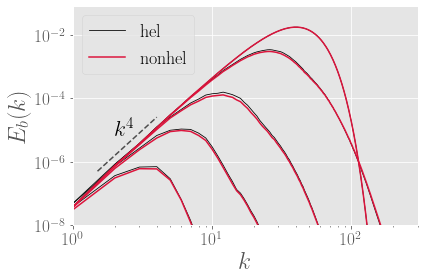

In [346]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
t = [0,4,32,128,480]
for idx, f in enumerate(files):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]

    for idx_t in t:
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=lw[idx],ls=ls[idx],label = tags[idx])
        else:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=lw[idx],ls=ls[idx],label ='__nolegend__')

k_slope = np.array([1.5,4])
ax.plot(k_slope,1e-7*np.power(k_slope,4),c='0.3',ls='--')
ax.text(2,7e-6,'$k^{4}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_b(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.set_ylim(1e-8,0.8e-1)
ax.set_xlim(1,300)
ax.legend(fontsize=18)
fig.tight_layout()
#fig.savefig('bleh.pdf',format='pdf')

hel case 	 p = 2.58 	 q = 0.47
nonhel case 	 p = 2.59 	 q = 0.47


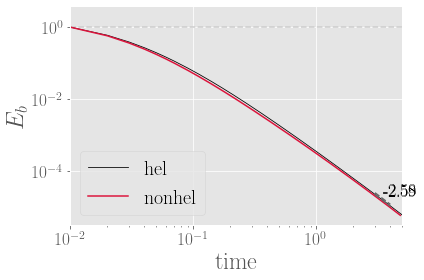

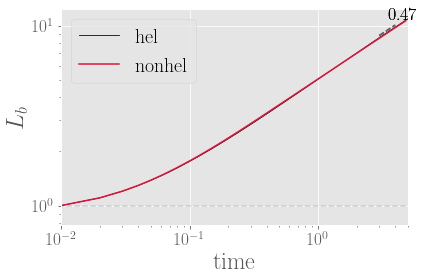

In [347]:
plt.style.use('ggplot')

fig, axE = plt.subplots()
figL, axL = plt.subplots()

p = []
q = []
for idx, f in enumerate(files):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[-200:]), np.log(B[-200:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[-200:]), np.log(Lb[-200:]), 1)
    q.append(mq)
    axE.plot(time,B/B[1],colors[idx],lw=lw[idx],label=tags[idx])
    axL.plot(time,Lb/Lb[1],colors[idx],lw=lw[idx],label=tags[idx])
    t_lines = np.array([3,3.5,4])
    
    y = np.power(t_lines,mp)*np.exp(bp)/B[1]*1.1
    axE.plot(t_lines,y,ls='--',c='0.4')
    axE.text(t_lines[1],y[1]*1.3,'{:.2f}'.format(mp),size=18)
    y = np.power(t_lines,mq)*np.exp(bq)/Lb[1]*1.03
    axL.plot(t_lines,y,ls='--',c='0.4')
    axL.text(t_lines[1],y[1]*1.15,'{:.2f}'.format(mq),size=18)
   
  
    print('{} case \t p = {:.2f} \t q = {:.2f}'.format(tags[idx],-mp,mq))
    

p = np.array(p)
q = np.array(q)

axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$E_{b}$',size = 24)
axE.set_xlabel('time',size = 24)
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}$',size = 24)
axL.set_xlabel('time',size = 24)
axE.legend(fontsize=20,loc=3)
axL.legend(fontsize=20,loc=2)
x_lims = ax.get_xlim()
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axL.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axE.set_xlim(1e-2,5)
axL.set_xlim(1e-2,5)
fig.tight_layout()
#fig.savefig('Eb_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
plt.show()

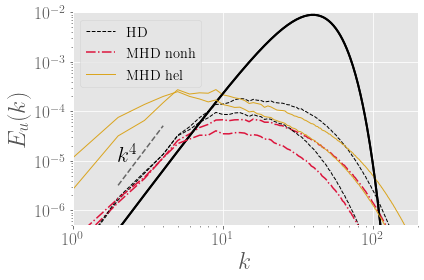

In [358]:
Eks_hydro = E_spectrum('HYDRO/dnl_hydro.u_1024_0.0003125.spc')
Eks_mhd = E_spectrum('NH_v0.0003125/nhd_up.u_1024_0.0003125_1.spc')
Eks_mhd_hel = E_spectrum('H_v0.0003125/hd_up.u_1024_0.0003125_1.spc')
plt.style.use('ggplot')
fig, ax = plt.subplots()
k = np.arange(1,341,1)
N = len(Eks_hydro)
t = [200,380]
#t = 1]
for idx_t in t:
    if idx_t == 200 :
        lab_hd = 'HD'
        lab_mhd = 'MHD nonh'
        lab_mhd2 = 'MHD hel'
    else:
        lab_hd = '__nolegend__'
        lab_mhd = '__nolegend__'
        lab_mhd2 = '__nolegend__'
   
    ax.plot(k,Eks_mhd_hel[0]/2,lw = 2,c='k')
    ax.plot(k,Eks_hydro[idx_t],lw=1,ls = '--', c='k',label = lab_hd)
    ax.plot(k,Eks_mhd[idx_t]/2,ls = '-.',c='crimson',label = lab_mhd)
    ax.plot(k,Eks_mhd_hel[idx_t]/2,lw = 1,c='goldenrod',label = lab_mhd2)
    
k_slope = np.array([2,4])
ax.plot(k_slope,2e-7*np.power(k_slope,4),c='0.4',ls='--')
ax.text(2,1e-5,'$k^{4}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_u(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.legend()
ax.set_ylim(5e-7,1e-2)
ax.set_xlim(1,200)
fig.tight_layout()
#fig.savefig('comparison_HD_MHD_hel_nonh.pdf',format='pdf')



In [359]:
f_hyd = 'HYDRO/dnl_hydro.u_1024_0.0003125.spc'
f_mhd = 'NH_v0.0003125/nhd_up.u_1024_0.0003125_1.spc'
f_mhd_hel = 'H_v0.0003125/hd_up.u_1024_0.0003125_1.spc'
E_hyd = col_Ehyd(f_hyd)
E_mhd= col_E(f_mhd)
E_mhd_hel = col_E(f_mhd_hel)
L_hyd = col_Lhyd(f_hyd)
L_mhd = col_L(f_mhd)
L_mhd_hel = col_L(f_mhd_hel)

dt_hyd = get_dt(f_hyd)
Ntimesteps_hyd = int((get_final_time(f_hyd) - get_initial_time(f_hyd))/dt_hyd)
t_hyd = [round(i*dt_hyd,2) for i in range(Ntimesteps_hyd+1)]

dt_mhd = get_dt(f_mhd)
Ntimesteps_mhd = int((get_final_time(f_mhd) - get_initial_time(f_mhd))/dt_mhd)
t_mhd = [round(i*dt_mhd,2) for i in range(Ntimesteps_mhd+1)]

dt_mhd_hel = get_dt(f_mhd_hel)
Ntimesteps_mhd_hel = int((get_final_time(f_mhd_hel) - get_initial_time(f_mhd_hel))/dt_mhd_hel)
t_mhd_hel = [round(i*dt_mhd_hel,2) for i in range(Ntimesteps_mhd_hel+1)]

p_hyd = -1.55
q_hyd = 0.46
p_mhd = -1.39
q_mhd = 0.41
p_mhd_hel = -0.72
q_mhd_hel = 0.56


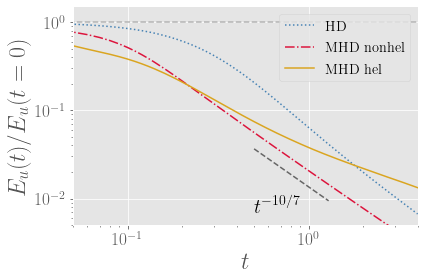

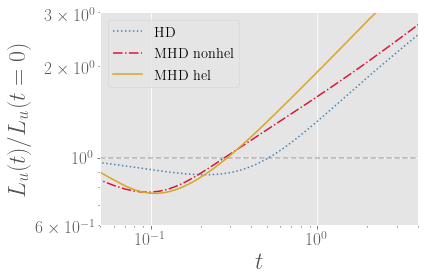

In [368]:
plt.style.use('ggplot')
figE, axE = plt.subplots()
figL, axL = plt.subplots()

mp, bp = np.polyfit(np.log(t_hyd[250:]), np.log(E_hyd[250:]), 1)
p_hyd = mp
mq, bq = np.polyfit(np.log(t_hyd[250:]), np.log(L_hyd[250:]), 1)
q_hyd = mq

mp, bp = np.polyfit(np.log(t_mhd[250:]), np.log(E_mhd[250:]), 1)
p_mhd = mp
mq, bq = np.polyfit(np.log(t_mhd[250:]), np.log(L_mhd[250:]), 1)
q_mhd = mq

mp, bp = np.polyfit(np.log(t_mhd_hel[250:]), np.log(E_mhd_hel[250:]), 1)
p_mhd_hel = mp
mq, bq = np.polyfit(np.log(t_mhd_hel[250:]), np.log(L_mhd_hel[250:]), 1)
q_mhd_hel = mq




axE.plot(t_hyd,E_hyd/E_hyd[1],linestyle = ':',c='steelblue',label = 'HD')
axE.plot(t_mhd,E_mhd/(E_mhd[1]),linestyle = '-.',c='crimson',label = 'MHD nonhel')
axE.plot(t_mhd_hel,E_mhd_hel/(E_mhd_hel[1]),linestyle = '-',c='goldenrod',label = 'MHD hel')

axE.plot(t_hyd[50:130],np.power(t_hyd[50:130],-10/7)*np.exp(bp)*2e-1/E_hyd[1],ls='--',c='0.4')
axE.text(0.5,7e-3,'$t^{-10/7}$',size= 20)


axE.set_xlabel('$t$',size=24)
xlims = axE.get_xlim()
axE.hlines(1,xlims[0],xlims[1],colors='0.7',ls = '--')
axE.set_xscale('log')
axE.set_yscale('log')
axE.set_xlim((0.05,4))
axE.set_ylim((5e-3,1.5))




axL.plot(t_hyd,L_hyd/L_hyd[1],linestyle = ':',c='steelblue',label = 'HD')
axL.plot(t_mhd,L_mhd/L_mhd[1],linestyle = '-.',c='crimson',label = 'MHD nonhel')
axL.plot(t_mhd_hel,L_mhd_hel/L_mhd_hel[1],linestyle = '-',c='goldenrod',label = 'MHD hel')
#axL.plot(t_hyd[60:300],np.power(t_hyd[60:300],2/7)*np.exp(bq)*0.7/L_hyd[1],ls='--',c='0.4')
#axL.text(1.5,1,'$t^{2/7}$',size= 20)
axL.set_xlabel('$t$',size=24)
    

xlims = axL.get_xlim()
#ax[idx].hlines(1,xlims[0],xlims[1],colors='0.7',ls = '--')
axL.hlines(1,xlims[0],xlims[1]+100,colors='0.7',ls = '--')
#ax1.text(1.5,1.175,'$\\nu= 0.0001$')
#ax[idx].legend()
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_xlim(0.05,4)
axL.set_ylim(0.6,3)
axE.set_ylabel('$E_u(t)/E_u(t=0)$',size=24)
axL.set_ylabel('$L_u(t)/L_u(t=0)$',size=24)
axE.legend()
axL.legend()

print('p_hyd = {:.2f}'.format(p_hyd))
print('q_hyd = {:.2f}'.format(q_hyd)) 

print('p_mhd = {:.2f}'.format(p_mhd))
print('q_mhd = {:.2f}'.format(q_mhd))

print('p_mhd_hel = {:.2f}'.format(p_mhd_hel))
print('q_mhd_hel = {:.2f}'.format(q_mhd_hel))


figE.tight_layout()
#figE.savefig('hydro_mhd_mhdhel_E.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('hydro_mhd_mhdhel_L.pdf',format='pdf')
plt.show()


In [108]:
def Lkol(eps,visc):
    return np.power((visc**3)/(eps),1/4)

Pm = 1
visc = 0.02
N = 512
kmax = int(N/3)-1
print('k_max = ',kmax)
print('Pm = ',Pm)
print('$visc = $', visc)
eta = visc/Pm
print('res= ',Lkol(0.1,eta) * kmax)
print('kkol = {}'.format(1/Lkol(0.1,eta)))

k_max =  169
Pm =  1
$visc = $ 0.02
res=  15.983033192153673
kkol = 10.57371263440564


kp = 5.0     , visc = 0.0009 	 p = 1.11 	 q = 0.39
kp = 5.0     , visc = 0.001 	 p = 1.13 	 q = 0.40
kp = 5.0     , visc = 0.003 	 p = 1.39 	 q = 0.50
kp = 5.0     , visc = 0.006 	 p = 1.39 	 q = 0.41
kp = 5.0     , visc = 0.009 	 p = 1.45 	 q = 0.43
kp = 20.0    , visc = 0.0009 	 p = 1.43 	 q = 0.40
kp = 20.0    , visc = 0.001 	 p = 1.46 	 q = 0.39
kp = 20.0    , visc = 0.003 	 p = 1.73 	 q = 0.43
kp = 20.0    , visc = 0.006 	 p = 1.93 	 q = 0.42
kp = 20.0    , visc = 0.009 	 p = 2.11 	 q = 0.42
kp = 100.0   , visc = 0.0004 	 p = 1.81 	 q = 0.43
kp = 100.0   , visc = 0.0009 	 p = 2.05 	 q = 0.45
kp = 100.0   , visc = 0.001 	 p = 2.09 	 q = 0.45
kp = 100.0   , visc = 0.003 	 p = 2.44 	 q = 0.49


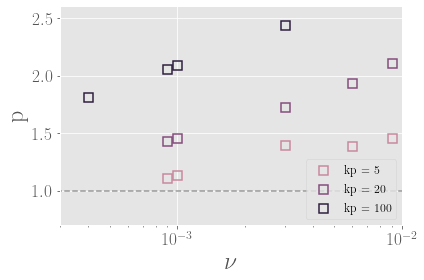

In [62]:
plt.style.use('ggplot')
fig,ax = plt.subplots()
p_colors = sns.cubehelix_palette(4)

    
p = []
q = []
ti = 400

Flag5 = True
Flag20 = True
Flag100 = True
for idx, f in enumerate(files):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    visc = viscs[idx]
    Va = Vas[idx]
    U = Us[idx]
    Lu = Lus[idx]
    Re = Lu[0]*U[0]/visc
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    kp = kps[idx]
    mp, bp = np.polyfit(np.log(time[ti:]), np.log(B[ti:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:]), np.log(Lb[ti:]), 1)
    q.append(mq)
    print('kp = {:<8}, visc = {} \t p = {:.2f} \t q = {:.2f}'.format(kp,visc,-mp,mq))
    
    if kp == 5:
        col = p_colors[1]
    elif kp ==20:
        col = p_colors[2]
    else:
        col = p_colors[3]
    if (kp == 5) and (Flag5 == True):
        label = 'kp = {:>}'.format(int(kp))
        Flag5=False
    elif (kp==20) and (Flag20 ==True):
        label = 'kp = {:>}'.format(int(kp))
        Flag20 =False
    elif (kp==100) and (Flag100 == True):
        label ='kp = {:>}'.format(int(kp))
        Flag100=False
    else:
        label = '__nolegend__'
    ax.plot(visc, -mp,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col,label= label)
    
        #ax.plot(Pms, q,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'goldenrod',label = '{:<}    {:>}'.format('$q$','hel'))
p = np.array(p)
q = np.array(q)




ax.set_xscale('log',basex=10)
ax.set_ylabel('p',size = 24)
ax.set_xlabel('$\\nu$',size = 24)
ax.legend(loc=4,fontsize=12)
x_lims = ax.get_xlim()
ax.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
ax.set_xlim(0.0003,0.01)
ax.set_ylim(0.7,2.6)
fig.tight_layout()
#fig.savefig('scalings_comparison_DNS_EDQNM.pdf',format='pdf')
plt.show()



In [10]:
files = glob('WN_test_varying_resol/v_0.005/*.b_*spc')

ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus,lbs,viscs, Pms, Ns, kps = dns.get_data_MHD(files)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs,lus,lbs, viscs, Pms, Ns, kps, files = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs,lus,lbs,viscs, Pms, Ns, kps, files, idx_sort)
idx_sort = np.argsort(kps)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs,lus,lbs,viscs, Pms, Ns, kps, files = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs,lus,lbs,viscs, Pms, Ns, kps, files, idx_sort)


# Comparing different k_peaks and different viscs with Pm=1

In [15]:
#assign colors depending on the different kp values

tags = [int(kp) if kp.is_integer() else kp for kp in kps]
ls = ['-' for i in range(len(files))]
colors = []
_colors = sns.color_palette('hls',9)
for kp in kps:
    if kp == 5:
        colors.append(_colors[0])
    elif kp == 10:
        colors.append(_colors[2])
    elif kp==40:
        colors.append(_colors[4])
    elif kp==100:
        colors.append(_colors[6])
    elif kp==250:
        colors.append(_colors[8])


In [18]:
files

array(['WN_test_varying_resol/v_0.005/WN5.b_1024_0.005_1.spc',
       'WN_test_varying_resol/v_0.005/WN10.b_1024_0.005_1.spc',
       'WN_test_varying_resol/v_0.005/WN40.b_1024_0.005_1.spc',
       'WN_test_varying_resol/v_0.005/WN100.b_1024_0.005_1.spc',
       'WN_test_varying_resol/v_0.005/WN250.b_1024_0.005_1.spc'],
      dtype='<U54')

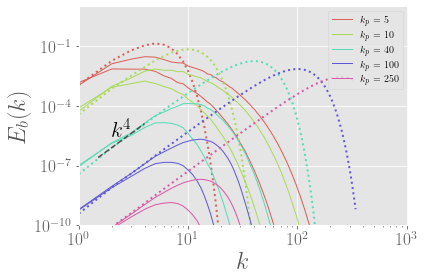

In [28]:
# Produce spectrum evolution Hardcoded times and label starting index
fig, ax = plt.subplots()
t = [0,120,450]

for idx, f in enumerate(files):
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    kp = kps[idx]

    
    for id_t,idx_t in enumerate(t):
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=2,ls=':',)
        elif id_t==1:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw = 1,label ='$k_p$ = {}'.format(int(kp)))
        else:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw = 1,label ='__nolegend__')

k_slope = np.array([1.5,4])
ax.plot(k_slope,5e-8*np.power(k_slope,4),c='0.3',ls='--')
ax.text(2,3e-6,'$k^{4}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_b(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.set_ylim(1e-10,10)
ax.set_xlim(1,1024)
ax.legend(loc=1,fontsize=10)
fig.tight_layout()
#fig.savefig('Spectrum.pdf',format='pdf')

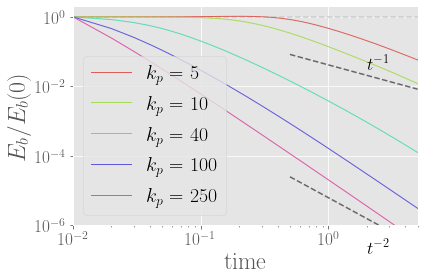

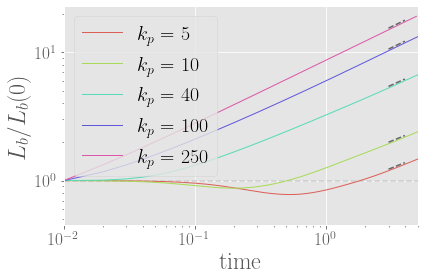

In [20]:
#produce time decay plots hardcoded 
fig, axE = plt.subplots()
figL, axL = plt.subplots()

p = []
q = []
for idx, f in enumerate(files):
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    visc = viscs[idx]
    
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[-200:]), np.log(B[-200:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[-200:]), np.log(Lb[-200:]), 1)
    q.append(mq)
   
    axE.plot(time,B/B[1],c=colors[idx],lw=1,label= '$k_p$ = {}'.format(tags[idx]))
    axL.plot(time,Lb/Lb[1],c=colors[idx],lw=1,label='$k_p$ = {}'.format(tags[idx]))
   
    t_lines = np.array([3,3.5,4])
    
    y = np.power(t_lines,mp)*np.exp(bp)/B[1]*1.1
    #axE.plot(t_lines,y,ls='--',c='0.4')
    #axE.text(t_lines[1],y[1]*1.3,'{:.2f}'.format(mp),size=18)
    y = np.power(t_lines,mq)*np.exp(bq)/Lb[1]*1.03
    axL.plot(t_lines,y,ls='--',c='0.4')
    #axL.text(t_lines[1],y[1]*1.15,'{:.2f}'.format(mq),size=18)
   

    
t_lines = np.array([0.5,2,5])
    
y = np.power(t_lines,-1)*np.exp(bp)/B[1]*2e3
axE.plot(t_lines,y,ls='--',c='0.4')
axE.text(t_lines[1],y[1]*1.5,'$t^{-1}$',size=18)
y = np.power(t_lines,-2)*np.exp(bp)/B[1]*3e-1
axE.plot(t_lines,y,ls='--',c='0.4')
axE.text(t_lines[1],y[1]*1e-1,'$t^{-2}$',size=18)

p = np.array(p)
q = np.array(q)

axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$E_{b}/E_b(0)$',size = 24)
axE.set_xlabel('time',size = 24)
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}/L_b(0)$',size = 24)
axL.set_xlabel('time',size = 24)
axE.legend(fontsize=20,loc=3)
axL.legend(fontsize=20,loc=2)

axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axL.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axE.set_xlim(1e-2,5)
axL.set_xlim(1e-2,5)
axE.set_ylim(1e-6,2)
fig.tight_layout()
fig.savefig('Eb_vs_t_WN.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
plt.show()

kp = 5.0     , visc = 0.005 	 p = 1.45 	 q = 0.42
64.45962854557602
kp = 10.0    , visc = 0.005 	 p = 1.64 	 q = 0.43
32.22965034721204
kp = 40.0    , visc = 0.005 	 p = 2.24 	 q = 0.46
8.057676891474987
kp = 100.0   , visc = 0.005 	 p = 2.49 	 q = 0.49
3.223072738078308
kp = 250.0   , visc = 0.005 	 p = 2.54 	 q = 0.49
1.2682946615734998


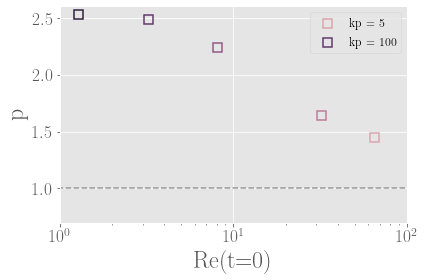

In [31]:
plt.style.use('ggplot')
fig,ax = plt.subplots()
p_colors = sns.cubehelix_palette(6)

    
p = []
q = []
ti = 400

Flag5 = True
Flag20 = True
Flag100 = True
for idx, f in enumerate(files):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    visc = viscs[idx]
    Va = Vas[idx]
    U = Us[idx]
    Lu = Lus[idx]
    Re = Lu[0]*U[0]/visc
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    kp = kps[idx]
    mp, bp = np.polyfit(np.log(time[ti:]), np.log(B[ti:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:]), np.log(Lb[ti:]), 1)
    q.append(mq)
    print('kp = {:<8}, visc = {} \t p = {:.2f} \t q = {:.2f}'.format(kp,visc,-mp,mq))
    print(Re)
    if kp == 5:
        col = p_colors[1]
    elif kp ==10:
        col = p_colors[2]
    elif kp ==40:
        col = p_colors[3]
    elif kp ==100:
        col = p_colors[4]
    else:
        col = p_colors[5]
    if (kp == 5) and (Flag5 == True):
        label = 'kp = {:>}'.format(int(kp))
        Flag5=False
    elif (kp==20) and (Flag20 ==True):
        label = 'kp = {:>}'.format(int(kp))
        Flag20 =False
    elif (kp==100) and (Flag100 == True):
        label ='kp = {:>}'.format(int(kp))
        Flag100=False
    else:
        label = '__nolegend__'
    ax.plot(Re, -mp,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col,label= label)
    
        #ax.plot(Pms, q,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'goldenrod',label = '{:<}    {:>}'.format('$q$','hel'))
p = np.array(p)
q = np.array(q)




ax.set_xscale('log',basex=10)
ax.set_ylabel('p',size = 24)
ax.set_xlabel('Re(t=0)',size = 24)
ax.legend(loc=1,fontsize=12)
x_lims = ax.get_xlim()
ax.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
ax.set_xlim(1,100)
ax.set_ylim(0.7,2.6)
fig.tight_layout()
#fig.savefig('scalings_comparison_DNS_EDQNM.pdf',format='pdf')
plt.show()



In [75]:
f_dns_hel = 'helical_runs/dhff.b_1024_0.005_0.0625.spc'
f_dns = 'dnff.b_1024_0.005_0.0625.spc'
#f_edqnm = 'dnff_edqnm.u_192_0.005.spc'
E_dns = col_B(f_dns)
#E_edqnm = ed.col_B(f_edqnm)
E_dns_hel = col_B(f_dns_hel)
L_dns = col_L(f_dns)
L_dns_hel = col_L(f_dns_hel)
#L_edqnm = ed.col_L(f_edqnm)
dt_dns = get_dt(f_dns)
dt_dns_hel = get_dt(f_dns_hel)
Ntimesteps_dns = int((get_final_time(f_dns) - get_initial_time(f_dns))/dt_dns)
Ntimesteps_dns_hel = int((get_final_time(f_dns_hel) - get_initial_time(f_dns_hel))/dt_dns_hel)
t_dns = [round(i*dt_dns,2) for i in range(Ntimesteps_dns+1)]
t_dns_hel = [round(i*dt_dns_hel,2) for i in range(Ntimesteps_dns_hel+1)]
#t_edqnm = ed.col_t(f_edqnm)

plt.style.use('ggplot')
figE, axE = plt.subplots()
figL, axL = plt.subplots()

mp, bp = np.polyfit(np.log(t_dns[10:]), np.log(E_dns[10:]), 1)
p_dns = mp
mq, bq = np.polyfit(np.log(t_dns[100:]), np.log(L_dns[100:]), 1)
q_dns = mq

#mp, bp = np.polyfit(np.log(t_edqnm[10:400]), np.log(E_edqnm[10:400]), 1)
#p_edqnm = mp
#mq, bq = np.polyfit(np.log(t_edqnm[100:400]), np.log(L_edqnm[100:400]), 1)
#q_edqnm = mq

mph, bph = np.polyfit(np.log(t_dns_hel[10:]), np.log(E_dns_hel[10:]), 1)
ph = mph
mqh, bqh = np.polyfit(np.log(t_dns_hel[100:]), np.log(L_dns_hel[100:]), 1)
qh = mqh
    
axE.plot(t_dns_hel,E_dns_hel/E_dns_hel[1],linestyle = '-',lw=4,c='goldenrod',label = 'DNS hel')
axE.plot(t_dns,E_dns/E_dns[1],linestyle = '-',c='steelblue',label = 'DNS nonh')
#axE.plot(t_edqnm,E_edqnm/(E_edqnm[1]),linestyle = '--',c='crimson',label = 'EDQNM')

axE.set_xlabel('$t$',size=24)
xlims = axE.get_xlim()
axE.hlines(1,xlims[0],xlims[1],colors='0.7',ls = '--')
axE.plot(t_lines,np.power(t_lines,ph)*np.exp(bph)/E_dns_hel[1]*1.8,ls='--',c='0.4')
axE.text(1,1e-4,'$t^{-2.6}$',size= 20)
axE.set_xscale('log')
axE.set_yscale('log')
axE.set_xlim((0.01,4))
axE.set_ylim((1e-6,1.5))
axL.plot(t_dns_hel,L_dns_hel/L_dns_hel[1],linestyle = '-', lw=4, c='goldenrod',label = 'DNS hel')
axL.plot(t_dns,L_dns/L_dns[1],linestyle = '-',c='steelblue',label = 'DNS nonh')
#axL.plot(t_edqnm,L_edqnm/L_edqnm[1],linestyle = '--',c='crimson',label = 'EDQNM')
axL.plot(t_lines,np.power(t_lines,q_dns)*np.exp(bq)/L_dns[1]*0.9,ls='--',c='0.4')
axL.text(1,2.2,'$t^{0.45}$',size= 20)


#axL.plot(t_edqnm,L_edqnm2,linestyle = '-',c='g',label = 'EDQNM2')
axL.set_xlabel('$t$',size=24)

xlims = axL.get_xlim()
#ax[idx].hlines(1,xlims[0],xlims[1],colors='0.7',ls = '--')
axL.hlines(1,xlims[0],xlims[1]+100,colors='0.7',ls = '--')
#ax1.text(1.5,1.175,'$\\nu= 0.0001$')
#ax[idx].legend()
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_xlim(0.01,4)
axL.set_ylim(0.9,5.5)
axE.set_ylabel('$E_b(t)/E_b(t=0)$',size=24)
axL.set_ylabel('$L_b(t)/L_b(t=0)$',size=24)
axE.legend()
axL.legend()

print('ph = ',ph)
print('qh = ',qh) 

print('p_nh = ',p_dns)
print('q_nh = ',q_dns) 

#print(p_edqnm)
#print(q_edqnm) 


figE.tight_layout()
figE.savefig('comparison_lowPm_E.pdf',format='pdf')
figL.tight_layout()
figL.savefig('comparison_lowPm_L.pdf',format='pdf')
plt.show()

In [334]:
files = ['H_v0.005/hc.b_512_0.005_0.25.spc','NH_v0.005/nhc.b_512_0.005_0.25.spc']


Bs, ks, Bks, times, Lbs, viscs, Pms= get_data_dns(files)
idx_sort = np.argsort(Pms)


Bs, ks, Bks, times, Lbs, viscs, Pms,files = arg_sort_dns(Bs,ks,Bks,times,Lbs,viscs, Pms, files, idx_sort)

Pms = [int(Pm) if Pm.is_integer() else Pm for Pm in Pms]
files

array(['H_v0.005/hc.b_512_0.005_0.25.spc',
       'NH_v0.005/nhc.b_512_0.005_0.25.spc'], dtype='<U34')

In [335]:
tags = ['hel','nonhel']
ls = ['-','-']
lw = ['0.8','1.5']
colors= ['k','crimson']


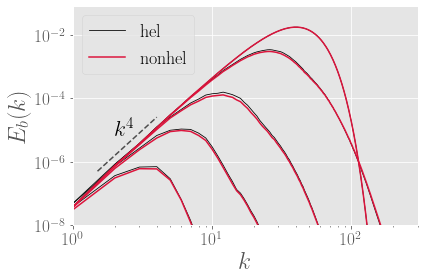

In [346]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
t = [0,4,32,128,480]
for idx, f in enumerate(files):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]

    for idx_t in t:
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=lw[idx],ls=ls[idx],label = tags[idx])
        else:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=lw[idx],ls=ls[idx],label ='__nolegend__')

k_slope = np.array([1.5,4])
ax.plot(k_slope,1e-7*np.power(k_slope,4),c='0.3',ls='--')
ax.text(2,7e-6,'$k^{4}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_b(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.set_ylim(1e-8,0.8e-1)
ax.set_xlim(1,300)
ax.legend(fontsize=18)
fig.tight_layout()
#fig.savefig('bleh.pdf',format='pdf')

hel case 	 p = 2.58 	 q = 0.47
nonhel case 	 p = 2.59 	 q = 0.47


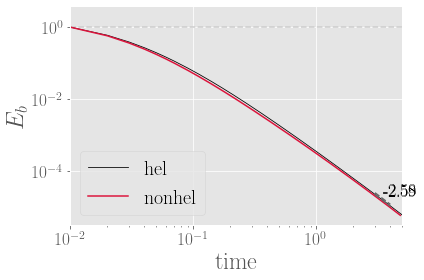

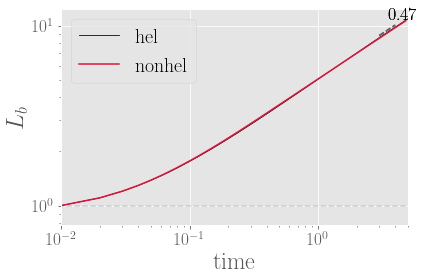

In [347]:
plt.style.use('ggplot')

fig, axE = plt.subplots()
figL, axL = plt.subplots()

p = []
q = []
for idx, f in enumerate(files):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[-200:]), np.log(B[-200:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[-200:]), np.log(Lb[-200:]), 1)
    q.append(mq)
    axE.plot(time,B/B[1],colors[idx],lw=lw[idx],label=tags[idx])
    axL.plot(time,Lb/Lb[1],colors[idx],lw=lw[idx],label=tags[idx])
    t_lines = np.array([3,3.5,4])
    
    y = np.power(t_lines,mp)*np.exp(bp)/B[1]*1.1
    axE.plot(t_lines,y,ls='--',c='0.4')
    axE.text(t_lines[1],y[1]*1.3,'{:.2f}'.format(mp),size=18)
    y = np.power(t_lines,mq)*np.exp(bq)/Lb[1]*1.03
    axL.plot(t_lines,y,ls='--',c='0.4')
    axL.text(t_lines[1],y[1]*1.15,'{:.2f}'.format(mq),size=18)
   
  
    print('{} case \t p = {:.2f} \t q = {:.2f}'.format(tags[idx],-mp,mq))
    

p = np.array(p)
q = np.array(q)

axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$E_{b}$',size = 24)
axE.set_xlabel('time',size = 24)
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}$',size = 24)
axL.set_xlabel('time',size = 24)
axE.legend(fontsize=20,loc=3)
axL.legend(fontsize=20,loc=2)
x_lims = ax.get_xlim()
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axL.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axE.set_xlim(1e-2,5)
axL.set_xlim(1e-2,5)
fig.tight_layout()
#fig.savefig('Eb_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
plt.show()

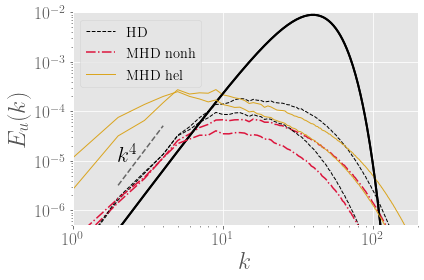

In [358]:
Eks_hydro = E_spectrum('HYDRO/dnl_hydro.u_1024_0.0003125.spc')
Eks_mhd = E_spectrum('NH_v0.0003125/nhd_up.u_1024_0.0003125_1.spc')
Eks_mhd_hel = E_spectrum('H_v0.0003125/hd_up.u_1024_0.0003125_1.spc')
plt.style.use('ggplot')
fig, ax = plt.subplots()
k = np.arange(1,341,1)
N = len(Eks_hydro)
t = [200,380]
#t = 1]
for idx_t in t:
    if idx_t == 200 :
        lab_hd = 'HD'
        lab_mhd = 'MHD nonh'
        lab_mhd2 = 'MHD hel'
    else:
        lab_hd = '__nolegend__'
        lab_mhd = '__nolegend__'
        lab_mhd2 = '__nolegend__'
   
    ax.plot(k,Eks_mhd_hel[0]/2,lw = 2,c='k')
    ax.plot(k,Eks_hydro[idx_t],lw=1,ls = '--', c='k',label = lab_hd)
    ax.plot(k,Eks_mhd[idx_t]/2,ls = '-.',c='crimson',label = lab_mhd)
    ax.plot(k,Eks_mhd_hel[idx_t]/2,lw = 1,c='goldenrod',label = lab_mhd2)
    
k_slope = np.array([2,4])
ax.plot(k_slope,2e-7*np.power(k_slope,4),c='0.4',ls='--')
ax.text(2,1e-5,'$k^{4}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_u(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.legend()
ax.set_ylim(5e-7,1e-2)
ax.set_xlim(1,200)
fig.tight_layout()
#fig.savefig('comparison_HD_MHD_hel_nonh.pdf',format='pdf')



In [359]:
f_hyd = 'HYDRO/dnl_hydro.u_1024_0.0003125.spc'
f_mhd = 'NH_v0.0003125/nhd_up.u_1024_0.0003125_1.spc'
f_mhd_hel = 'H_v0.0003125/hd_up.u_1024_0.0003125_1.spc'
E_hyd = col_Ehyd(f_hyd)
E_mhd= col_E(f_mhd)
E_mhd_hel = col_E(f_mhd_hel)
L_hyd = col_Lhyd(f_hyd)
L_mhd = col_L(f_mhd)
L_mhd_hel = col_L(f_mhd_hel)

dt_hyd = get_dt(f_hyd)
Ntimesteps_hyd = int((get_final_time(f_hyd) - get_initial_time(f_hyd))/dt_hyd)
t_hyd = [round(i*dt_hyd,2) for i in range(Ntimesteps_hyd+1)]

dt_mhd = get_dt(f_mhd)
Ntimesteps_mhd = int((get_final_time(f_mhd) - get_initial_time(f_mhd))/dt_mhd)
t_mhd = [round(i*dt_mhd,2) for i in range(Ntimesteps_mhd+1)]

dt_mhd_hel = get_dt(f_mhd_hel)
Ntimesteps_mhd_hel = int((get_final_time(f_mhd_hel) - get_initial_time(f_mhd_hel))/dt_mhd_hel)
t_mhd_hel = [round(i*dt_mhd_hel,2) for i in range(Ntimesteps_mhd_hel+1)]

p_hyd = -1.55
q_hyd = 0.46
p_mhd = -1.39
q_mhd = 0.41
p_mhd_hel = -0.72
q_mhd_hel = 0.56


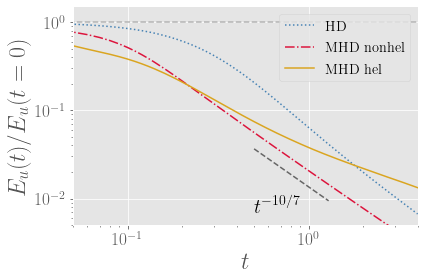

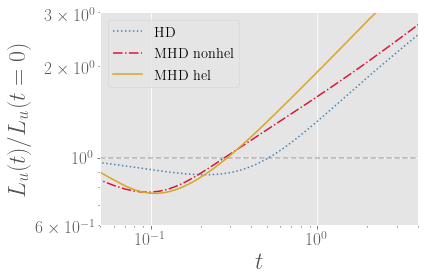

In [368]:
plt.style.use('ggplot')
figE, axE = plt.subplots()
figL, axL = plt.subplots()

mp, bp = np.polyfit(np.log(t_hyd[250:]), np.log(E_hyd[250:]), 1)
p_hyd = mp
mq, bq = np.polyfit(np.log(t_hyd[250:]), np.log(L_hyd[250:]), 1)
q_hyd = mq

mp, bp = np.polyfit(np.log(t_mhd[250:]), np.log(E_mhd[250:]), 1)
p_mhd = mp
mq, bq = np.polyfit(np.log(t_mhd[250:]), np.log(L_mhd[250:]), 1)
q_mhd = mq

mp, bp = np.polyfit(np.log(t_mhd_hel[250:]), np.log(E_mhd_hel[250:]), 1)
p_mhd_hel = mp
mq, bq = np.polyfit(np.log(t_mhd_hel[250:]), np.log(L_mhd_hel[250:]), 1)
q_mhd_hel = mq




axE.plot(t_hyd,E_hyd/E_hyd[1],linestyle = ':',c='steelblue',label = 'HD')
axE.plot(t_mhd,E_mhd/(E_mhd[1]),linestyle = '-.',c='crimson',label = 'MHD nonhel')
axE.plot(t_mhd_hel,E_mhd_hel/(E_mhd_hel[1]),linestyle = '-',c='goldenrod',label = 'MHD hel')

axE.plot(t_hyd[50:130],np.power(t_hyd[50:130],-10/7)*np.exp(bp)*2e-1/E_hyd[1],ls='--',c='0.4')
axE.text(0.5,7e-3,'$t^{-10/7}$',size= 20)


axE.set_xlabel('$t$',size=24)
xlims = axE.get_xlim()
axE.hlines(1,xlims[0],xlims[1],colors='0.7',ls = '--')
axE.set_xscale('log')
axE.set_yscale('log')
axE.set_xlim((0.05,4))
axE.set_ylim((5e-3,1.5))




axL.plot(t_hyd,L_hyd/L_hyd[1],linestyle = ':',c='steelblue',label = 'HD')
axL.plot(t_mhd,L_mhd/L_mhd[1],linestyle = '-.',c='crimson',label = 'MHD nonhel')
axL.plot(t_mhd_hel,L_mhd_hel/L_mhd_hel[1],linestyle = '-',c='goldenrod',label = 'MHD hel')
#axL.plot(t_hyd[60:300],np.power(t_hyd[60:300],2/7)*np.exp(bq)*0.7/L_hyd[1],ls='--',c='0.4')
#axL.text(1.5,1,'$t^{2/7}$',size= 20)
axL.set_xlabel('$t$',size=24)
    

xlims = axL.get_xlim()
#ax[idx].hlines(1,xlims[0],xlims[1],colors='0.7',ls = '--')
axL.hlines(1,xlims[0],xlims[1]+100,colors='0.7',ls = '--')
#ax1.text(1.5,1.175,'$\\nu= 0.0001$')
#ax[idx].legend()
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_xlim(0.05,4)
axL.set_ylim(0.6,3)
axE.set_ylabel('$E_u(t)/E_u(t=0)$',size=24)
axL.set_ylabel('$L_u(t)/L_u(t=0)$',size=24)
axE.legend()
axL.legend()

print('p_hyd = {:.2f}'.format(p_hyd))
print('q_hyd = {:.2f}'.format(q_hyd)) 

print('p_mhd = {:.2f}'.format(p_mhd))
print('q_mhd = {:.2f}'.format(q_mhd))

print('p_mhd_hel = {:.2f}'.format(p_mhd_hel))
print('q_mhd_hel = {:.2f}'.format(q_mhd_hel))


figE.tight_layout()
#figE.savefig('hydro_mhd_mhdhel_E.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('hydro_mhd_mhdhel_L.pdf',format='pdf')
plt.show()


In [108]:
def Lkol(eps,visc):
    return np.power((visc**3)/(eps),1/4)

Pm = 1
visc = 0.02
N = 512
kmax = int(N/3)-1
print('k_max = ',kmax)
print('Pm = ',Pm)
print('$visc = $', visc)
eta = visc/Pm
print('res= ',Lkol(0.1,eta) * kmax)
print('kkol = {}'.format(1/Lkol(0.1,eta)))

k_max =  169
Pm =  1
$visc = $ 0.02
res=  15.983033192153673
kkol = 10.57371263440564


kp = 5.0     , visc = 0.0009 	 p = 1.11 	 q = 0.39
kp = 5.0     , visc = 0.001 	 p = 1.13 	 q = 0.40
kp = 5.0     , visc = 0.003 	 p = 1.39 	 q = 0.50
kp = 5.0     , visc = 0.006 	 p = 1.39 	 q = 0.41
kp = 5.0     , visc = 0.009 	 p = 1.45 	 q = 0.43
kp = 20.0    , visc = 0.0009 	 p = 1.43 	 q = 0.40
kp = 20.0    , visc = 0.001 	 p = 1.46 	 q = 0.39
kp = 20.0    , visc = 0.003 	 p = 1.73 	 q = 0.43
kp = 20.0    , visc = 0.006 	 p = 1.93 	 q = 0.42
kp = 20.0    , visc = 0.009 	 p = 2.11 	 q = 0.42
kp = 100.0   , visc = 0.0004 	 p = 1.81 	 q = 0.43
kp = 100.0   , visc = 0.0009 	 p = 2.05 	 q = 0.45
kp = 100.0   , visc = 0.001 	 p = 2.09 	 q = 0.45
kp = 100.0   , visc = 0.003 	 p = 2.44 	 q = 0.49


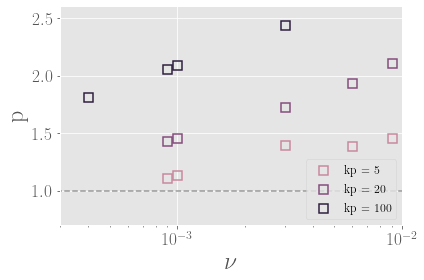

In [62]:
plt.style.use('ggplot')
fig,ax = plt.subplots()
p_colors = sns.cubehelix_palette(4)

    
p = []
q = []
ti = 400

Flag5 = True
Flag20 = True
Flag100 = True
for idx, f in enumerate(files):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    visc = viscs[idx]
    Va = Vas[idx]
    U = Us[idx]
    Lu = Lus[idx]
    Re = Lu[0]*U[0]/visc
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    kp = kps[idx]
    mp, bp = np.polyfit(np.log(time[ti:]), np.log(B[ti:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:]), np.log(Lb[ti:]), 1)
    q.append(mq)
    print('kp = {:<8}, visc = {} \t p = {:.2f} \t q = {:.2f}'.format(kp,visc,-mp,mq))
    
    if kp == 5:
        col = p_colors[1]
    elif kp ==20:
        col = p_colors[2]
    else:
        col = p_colors[3]
    if (kp == 5) and (Flag5 == True):
        label = 'kp = {:>}'.format(int(kp))
        Flag5=False
    elif (kp==20) and (Flag20 ==True):
        label = 'kp = {:>}'.format(int(kp))
        Flag20 =False
    elif (kp==100) and (Flag100 == True):
        label ='kp = {:>}'.format(int(kp))
        Flag100=False
    else:
        label = '__nolegend__'
    ax.plot(visc, -mp,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col,label= label)
    
        #ax.plot(Pms, q,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'goldenrod',label = '{:<}    {:>}'.format('$q$','hel'))
p = np.array(p)
q = np.array(q)




ax.set_xscale('log',basex=10)
ax.set_ylabel('p',size = 24)
ax.set_xlabel('$\\nu$',size = 24)
ax.legend(loc=4,fontsize=12)
x_lims = ax.get_xlim()
ax.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
ax.set_xlim(0.0003,0.01)
ax.set_ylim(0.7,2.6)
fig.tight_layout()
#fig.savefig('scalings_comparison_DNS_EDQNM.pdf',format='pdf')
plt.show()

